In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('Melbourne_housing_extra_data.csv')

In [3]:
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra,-37.7996,144.9989,Northern Metropolitan,4019.0


In [4]:
df.shape

(19740, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
Suburb           19740 non-null object
Address          19740 non-null object
Rooms            19740 non-null int64
Type             19740 non-null object
Price            15396 non-null float64
Method           19740 non-null object
SellerG          19740 non-null object
Date             19740 non-null object
Distance         19732 non-null float64
Postcode         19732 non-null float64
Bedroom2         15327 non-null float64
Bathroom         15327 non-null float64
Car              15327 non-null float64
Landsize         14944 non-null float64
BuildingArea     8617 non-null float64
YearBuilt        9351 non-null float64
CouncilArea      15296 non-null object
Lattitude        15448 non-null float64
Longtitude       15448 non-null float64
Regionname       19732 non-null object
Propertycount    19732 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 3.2+ MB


In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
 df['Bedroom2'].unique()

array([ 2.,  3.,  4.,  6., nan,  1.,  5.,  7.,  0.,  8.,  9., 30., 20.,
       10.])

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19740.000000,1.539600e+04,19732.000000,19732.000000,15327.000000,15327.000000,15327.000000,14944.000000,8617.000000,9351.000000,15448.000000,15448.000000,19732.000000
mean,2.947163,1.054957e+06,9.861509,3106.533904,2.900568,1.548509,1.578065,583.917090,196.806973,1874.165655,-37.811892,144.996632,7509.802706
std,0.981048,6.452557e+05,5.554233,88.429928,1.007491,0.713385,0.972221,3785.423175,561.558007,393.354888,0.072708,0.096178,4419.678648
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431620,249.000000
25%,2.000000,6.300000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1930.000000,-37.856860,144.939323,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,420.000000,132.000000,1965.000000,-37.808965,145.000900,6567.000000
75%,4.000000,1.301000e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,663.000000,199.000000,1997.000000,-37.761897,145.054710,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,40468.000000,2106.000000,-37.413810,145.526350,21650.000000


In [9]:
df['Suburb'].nunique()

330

In [10]:
df['Postcode'].nunique()

204

In [11]:
df['Propertycount'].nunique()

325

In [12]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.509418,0.269207,0.061950,0.813577,0.530170,0.360047,0.031944,0.094990,-0.025048,0.011168,0.087867,-0.092812
Price,0.509418,1.000000,-0.148968,0.122798,0.451911,0.437245,0.235596,0.035592,0.067846,0.049644,-0.174797,0.171292,-0.048676
Distance,0.269207,-0.148968,1.000000,0.405859,0.227853,0.095149,0.219264,0.049019,0.086541,-0.191171,-0.074757,0.168699,-0.075737
Postcode,0.061950,0.122798,0.405859,1.000000,0.042358,0.090628,0.030805,0.030740,0.057683,-0.094906,-0.373963,0.355115,0.042264
Bedroom2,0.813577,0.451911,0.227853,0.042358,1.000000,0.595986,0.389490,0.023325,0.109601,-0.026223,0.002734,0.110401,-0.093214
Bathroom,0.530170,0.437245,0.095149,0.090628,0.595986,1.000000,0.320351,0.032432,0.087146,0.015926,-0.088038,0.120101,-0.048417
Car,0.360047,0.235596,0.219264,0.030805,0.389490,0.320351,1.000000,0.025466,0.088138,-0.020740,-0.006575,0.070005,-0.028986
Landsize,0.031944,0.035592,0.049019,0.030740,0.023325,0.032432,0.025466,1.000000,0.156822,-0.312512,0.003171,0.017595,0.013741
BuildingArea,0.094990,0.067846,0.086541,0.057683,0.109601,0.087146,0.088138,0.156822,1.000000,-0.368791,0.021224,-0.004944,-0.014161
YearBuilt,-0.025048,0.049644,-0.191171,-0.094906,-0.026223,0.015926,-0.020740,-0.312512,-0.368791,1.000000,0.000383,-0.011983,-0.029317


In [13]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [14]:
df1=df.drop(['BuildingArea','YearBuilt'],axis=1)

In [15]:
df1=df1.dropna()

In [16]:
dummies=pd.get_dummies(df1[['Type','Method']])

In [17]:
X=df1.drop(['Suburb','Type','Method','Date','SellerG','Address','Regionname','CouncilArea'],axis=1)

In [18]:
X=X.join(dummies)

In [19]:
X.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'],
      dtype='object')

In [20]:
y=X['Price']

In [21]:
X.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'],
      dtype='object')

In [22]:
X=X.drop('Price',axis=1)

In [23]:
X.shape,y.shape

((11646, 18), (11646,))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

## Linear Regression 

In [26]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred=lm.predict(X_test)

In [28]:
from sklearn import metrics


In [29]:
print("MAE:", metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 288140.2446196074
MSE: 186293887924.08356
RMSE: 431617.75672935834


In [30]:
lm.score(X_train,y_train)

0.5531679659084121

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12852ad68>,
      dtype=object)

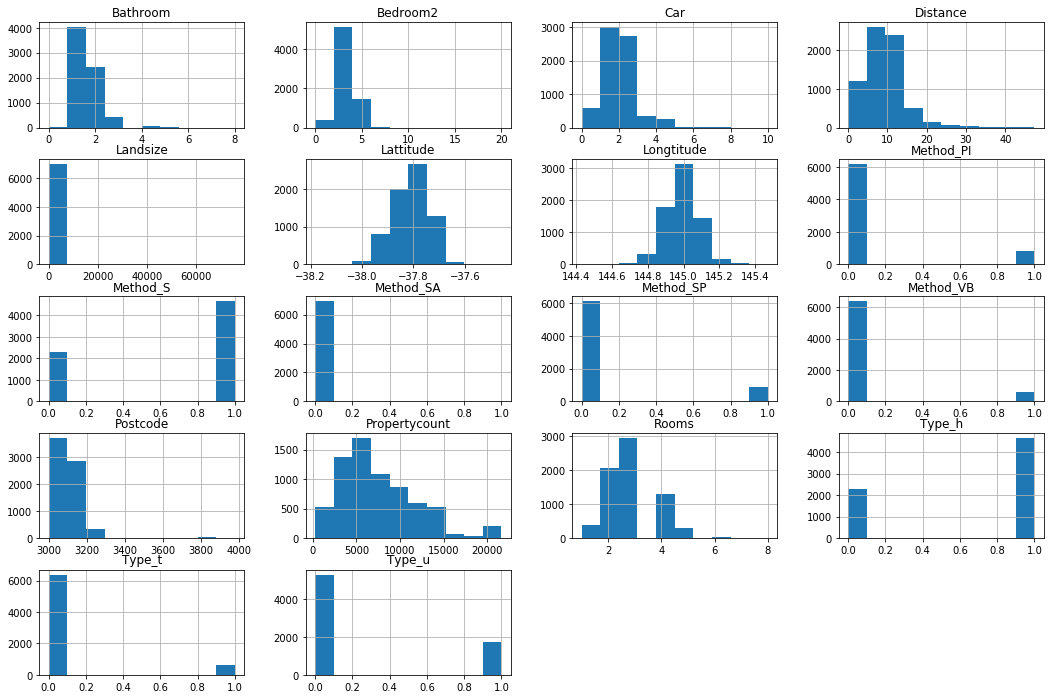

In [31]:
plt.rcParams['figure.figsize']=(18,12)
X_train.hist()

In [32]:
lm.coef_

array([ 2.44667389e+05, -5.57550503e+04,  1.61823828e+03, -2.40782176e+04,
        1.90425530e+05,  5.83749964e+04,  4.37367239e+00, -1.19519559e+06,
        5.37378027e+05, -2.00573120e+00,  2.54048034e+05, -5.36478781e+04,
       -2.00400156e+05, -4.11926943e+04,  3.26750287e+04,  6.71432192e+04,
       -4.79701328e+04, -1.06554207e+04])

In [33]:
#Normalising the data 
lm_normal=LinearRegression(normalize=True)
lm_normal.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
lm_normal.score(X_train,y_train)

0.553129696476478

##    ## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
rf_pred=rf.predict(X_test)

In [37]:
rf.score(X_train,y_train)

0.9665667154768547

In [38]:
accuracy=pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
accuracy.head()

,Actual,Predicted
4496,757000.0,6.967100e+05
14742,1593000.0,2.038383e+06
18219,900000.0,1.024850e+06
2233,620000.0,6.397700e+05
17767,582000.0,6.295900e+05


In [39]:
print('MAE:',metrics.mean_absolute_error(rf_pred,y_test))
print('MSE:',metrics.mean_squared_error(rf_pred,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(rf_pred,y_test)))

MAE: 188908.42626519076
MSE: 104384802603.98718
RMSE: 323086.37019222457


In [40]:
rf.score(X_test,y_test)

0.7446738813256456

In [41]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

params={'n_estimators':[10,50,100,200,500,1000],'min_samples_leaf':np.arange(2,10)}
best_rf=GridSearchCV(RandomForestRegressor(),param_grid=params,n_jobs=-1,verbose=1)
best_rf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'min_samples_leaf': array([2

In [42]:
rf.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [43]:
best_rf.best_params_,best_rf.best_score_

({'min_samples_leaf': 2, 'n_estimators': 500}, 0.752586924638832)